In [4]:
from textblob import TextBlob
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, SentimentOptions, CategoriesOptions
import re
from unicodedata import normalize
import string
import pandas as pd

In [2]:
def textblow_score(frase):
    polarity = TextBlob(frase).sentiment.polarity
    return polarity

# Lectura de datos

In [5]:
path_train="C:/Users/Esperanza/Desktop/UOC/TFM/python/jigsaw-unintended-bias-in-toxicity-classification/train.csv"
df_train = pd.read_csv(path_train)

In [48]:
# Selección de las columnas de interes
df_train_samp=df_train[['target', 'comment_text']]
#Para poder realizar un análsis equivalente al del Español, tomamos 600 comentarios
df_train_samp=df_train_samp.iloc[1:600, :]

In [49]:
df_train_samp['res_TextBlow']=df_train_samp.loc[:,'comment_text'].map(lambda txt: str(textblow_score(txt) ))

In [50]:
df_train_samp.target=[1 if elem > 0.6 else 0 for elem in df_train_samp.target ]
#df_train_samp.res_TextBlow = [1 if elem >= 0 else 0 for elem in df_train_samp.res_TextBlow ]

In [51]:
df_train_samp.res_TextBlow = [float(x) for x in df_train_samp.res_TextBlow]
df_train_samp.res_TextBlow = [1 if elem >= 0 else 0 for elem in df_train_samp.res_TextBlow ]

In [52]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


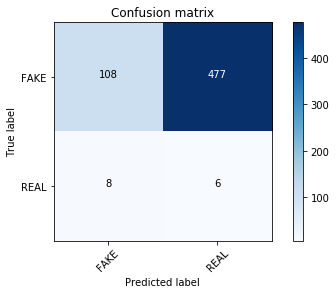

In [53]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools  

cm=confusion_matrix(df_train_samp.target, df_train_samp.res_TextBlow)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [47]:
df=df_train_samp
df[df['target']==1]

,target,comment_text,res_TextBlow
4,1,haha you guys are a bunch of losers.,1
5,1,ur a sh*tty comment.,1
13,1,It's ridiculous that these guys are being call...,0
14,1,This story gets more ridiculous by the hour! A...,1
19,1,"Angry trolls, misogynists and Racists"", oh my....",0
31,1,Yet call out all Muslims for the acts of a few...,0
34,1,This bitch is nuts. Who would read a book by a...,1
84,1,"Tuesday Jan. 13, members of \nthis socalled 'm...",0
105,1,Love that they also participate in the Portlan...,1
123,1,Took this as an opportunity to check back in o...,0
